In [10]:
# !pip install "dask[bag]"
# !pip install "dask[complete]"

# !pip install opencv-python
# !pip install keras
# !pip install tensorflow
# !pip install tqdm
# !pip install --upgrade pip

In [11]:
import os
import random
import numpy as np
import pandas as pd
# from skimage import io
# from skimage import color

from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
# from cv2 import cv2


from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.layers import BatchNormalization
from keras import optimizers

# from google.colab import drive
import os
import random
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
# from skimage import io
# from skimage import color
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag
from dask import threaded
# from dask.diagnostics import ProgressBar
import cv2
from sklearn.svm import SVC
from sklearn import datasets, svm, metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")



import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Flatten,Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.layers import BatchNormalization
from keras import optimizers



In [12]:
# !pip install "dask[bag]"
# !pip install "dask[complete]"

driver_details = pd.read_csv(r"C:\Users\rvasw\Downloads\state-farm-distracted-driver-detection\driver_imgs_list.csv",na_values='na')
print(driver_details.head(5))

driver_details.shape

# driver_details['subject'].value_counts()

# driver_details[driver_details['classname']=='c9']['subject'].unique()

# driver_details.loc[(driver_details['classname']=='c9') & (driver_details['img']=='p050')]

driv_selected = ['p050', 'p015', 'p022', 'p056','p047']



  subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg


In [13]:
#  select the folders
# after folder select the image
# after image resize the image
# check the image subject in  provided csv take the subject.
#handling unknown images in database by if else conditions


train_image = []
image_label = []
pass_image=[]
train_image.clear()
image_label.clear()


for i in range(10):
    print('drive folder',i)
    # ""C:\Users\rvasw\Downloads\state-farm-distracted-driver-detection\imgs\train""
    imgs = os.listdir("C:/Users/rvasw/Downloads/state-farm-distracted-driver-detection/imgs/train/c"+str(i))
    print("imgs = ",imgs)
    for j in range(len(imgs)):
    #for j in range(100):
        img_name = "C:/Users/rvasw/Downloads/state-farm-distracted-driver-detection/imgs/train/c"+str(i)+"/"+imgs[j]
        print('image_name = ',img_name)
        img = cv2.imread(img_name)
        #img = color.rgb2gray(img)
        img = img[50:,120:-50]
        img = cv2.resize(img, (224, 224))
        label = i
        # print(' image j = ',img[j])
        if imgs[j] in list(driver_details['img']):
          driver = driver_details[driver_details['img'] == imgs[j]]['subject'].values[0]
          train_image.append([img,label,driver])
          image_label.append(i)
          print(f'done driver =',driver)
        else:
          pass_image.append(imgs[j])
          print(f'passing {imgs[j]}')
          pass

print("pass image list = \n",pass_image,len(pass_image))


drive folder 0
imgs =  ['img_100026.jpg', 'img_10003.jpg', 'img_100050.jpg', 'img_100074.jpg', 'img_10012.jpg', 'img_100145.jpg', 'img_100191.jpg', 'img_100257.jpg', 'img_100312.jpg', 'img_100337.jpg', 'img_100456.jpg', 'img_1005.jpg', 'img_10053.jpg', 'img_100542.jpg', 'img_100598.jpg', 'img_100605.jpg', 'img_100656.jpg', 'img_100665.jpg', 'img_100796.jpg', 'img_100824.jpg', 'img_100828.jpg', 'img_10092.jpg', 'img_100922.jpg', 'img_101015.jpg', 'img_101032.jpg', 'img_101091.jpg', 'img_101113.jpg', 'img_101159.jpg', 'img_101175.jpg', 'img_101196.jpg', 'img_101223.jpg', 'img_101286.jpg', 'img_101383.jpg', 'img_101392.jpg', 'img_10141.jpg', 'img_101414.jpg', 'img_101419.jpg', 'img_101498.jpg', 'img_101555.jpg', 'img_101609.jpg', 'img_101613.jpg', 'img_101668.jpg', 'img_10167.jpg', 'img_101673.jpg', 'img_101702.jpg', 'img_10175.jpg', 'img_101785.jpg', 'img_101859.jpg', 'img_101938.jpg', 'img_102025.jpg', 'img_10206.jpg', 'img_102087.jpg', 'img_10225.jpg', 'img_10307.jpg', 'img_10314.jpg',

In [14]:

import random
random.shuffle(train_image)

driv_selected = ['p050', 'p015', 'p022', 'p056']

## Splitting the train and test

X_train= []
y_train = []
X_test = []
y_test = []
D_train = []
D_test = []

for features,labels,drivers in train_image:
    if drivers in driv_selected:
        X_test.append(features)
        y_test.append(labels)
        D_test.append(drivers)

    else:
        X_train.append(features)
        y_train.append(labels)
        D_train.append(drivers)

print (len(X_train),len(X_test))
print (len(y_train),len(y_test))

# len(test_no),len(train_no)

X_train = np.array(X_train).reshape(-1,224,224,3)
X_test = np.array(X_test).reshape(-1,224,224,3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print (X_train.shape)

print('train image length',len(train_image))




18732 3692
18732 3692
(18732, 224, 224, 3)
train image length 22424


In [15]:
# X_train1=X_train.copy()
# y_train1=y_train.copy()
# X_test1=X_test.copy()
# y_test1=y_test.copy()

# X_train1.shape,y_train1.shape,X_test1.shape,y_test1.shape

In [16]:
# type(X_train),type(y_train)

In [17]:
# X_train=X_train1[:10000,:]
# X_train.shape

In [18]:
# y_train=y_train1[:10000,:]
# y_train.shape

In [19]:
# X_test=X_test1[:2500,:]
# X_test.shape

In [20]:
# y_test=y_test1[:2500,:]
# y_test.shape

In [21]:
# X_train=X_train1.copy()
# y_train=y_train1.copy()
# X_test=X_test1.copy()
# y_test=y_test1.copy()

# X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [22]:
# 3692/(18732+3692)

In [23]:
# 5000*


In [28]:
import os
import random
import numpy as np
import pandas as pd 
# from skimage import io
# from skimage import color
from PIL import Image
import PIL.Image
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from dask.array.image import imread
from dask import bag, threaded
from dask.diagnostics import ProgressBar
import cv2
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from keras import backend as K
# fro/m keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from IPython.display import Image

from keras.models import Model


In [25]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model.summary()

In [30]:
x=base_model.output
x=GlobalAveragePooling2D()(x)

# x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.

# x = Dropout(0.1)(x) # ****reduce dropout 

# x=Dense(1024,activation='relu')(x) #dense layer 2

# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# x=Dense(512,activation='relu')(x) #dense layer 3

preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

model = Model(inputs=base_model.input, outputs=preds)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 32)    128 

In [31]:
from keras import optimizers  

#adam = optimizers.Adam(lr=0.001) #tried 0.0005 - too slow and didn't converge
sgd = optimizers.SGD(lr = 0.005) # try 0.01 - didn't converge and 0.005 , 0.001 best acc of 11%

model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy']) # create object

In [32]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping

checkpointer = ModelCheckpoint('mobilenet_sgd_nolayers.hdf5', verbose=1, save_best_only=True)
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

datagen = ImageDataGenerator(
    height_shift_range=0.5,
    width_shift_range = 0.5,
    zoom_range = 0.5,
    rotation_range=30
        )
#datagen.fit(X_train)
data_generator = datagen.flow(X_train, y_train, batch_size = 64)

# Fits the model on batches with real-time data augmentation:
mobilenet_model = model.fit_generator(data_generator,steps_per_epoch = len(X_train) / 64, callbacks=[checkpointer, earlystopper],
                                                            epochs = 7, verbose = 1, validation_data = (X_test, y_test))


Epoch 1/7



293/292 [==============================] - ETA: 0s - loss: 1.5091 - accuracy: 0.4904
Epoch 1: val_loss improved from inf to 0.73180, saving model to mobilenet_sgd_nolayers.hdf5
292/292 [==============================] - 759s 3s/step - loss: 1.5091 - accuracy: 0.4904 - val_loss: 0.7318 - val_accuracy: 0.7608
Epoch 2/7
293/292 [==============================] - ETA: 0s - loss: 0.7503 - accuracy: 0.7551
Epoch 2: val_loss improved from 0.73180 to 0.56592, saving model to mobilenet_sgd_nolayers.hdf5
292/292 [==============================] - 813s 3s/step - loss: 0.7503 - accuracy: 0.7551 - val_loss: 0.5659 - val_accuracy: 0.7993
Epoch 3/7
293/292 [==============================] - ETA: 0s - loss: 0.5816 - accuracy: 0.8056
Epoch 3: val_loss improved from 0.56592 to 0.54223, saving model to mobilenet_sgd_nolayers.hdf5
292/292 [==============================] - 841s 3s/step - loss: 0.5816 - accuracy: 0.8056 - val_loss: 0.5422 - val_accuracy: 0.8210
Epoch 4/7
293/292 [==========================

In [82]:
# from sklearn.externals import joblib
import pickle
import joblib

filename = "Completed_model.joblib"
joblib.dump(mobilenet_model, filename)

['Completed_model.joblib']

In [ ]:
! pip install

Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9
Image number: 10
Image number: 11
Image number: 12
Image number: 13
Image number: 14
Image number: 15
Image number: 16
Image number: 17
Image number: 18
Image number: 19


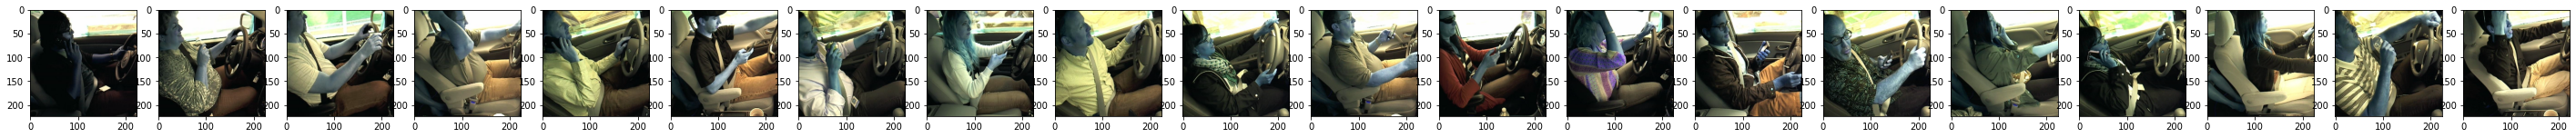

In [34]:
test_image = []
test_image.clear()
i = 0
fig, ax = plt.subplots(1, 20, figsize = (50,50 ))

files = os.listdir("C:\\Users\\rvasw\\Downloads\\state-farm-distracted-driver-detection\\imgs\\test")
nums = np.random.randint(low=1, high=len(files), size=20)
for i in range(20):
    print ('Image number:',i)
    img = cv2.imread("C:\\Users\\rvasw\\Downloads\\state-farm-distracted-driver-detection\\imgs\\test\\"+files[nums[i]])
    #img = color.rgb2gray(img)
    img = img[50:,120:-50]
    img = cv2.resize(img,(224,224))
    test_image.append(img)
    ax[i].imshow(img,cmap = 'gray')
    plt.show

In [35]:
test = []

for img in test_image:
    test.append(img)
    
model.load_weights('mobilenet_sgd_nolayers.hdf5')


test = np.array(test).reshape(-1,224,224,3)
prediction = model.predict(test)

1/1 [==============================] - 1s 626ms/step


In [36]:
tags = { "C0": "safe driving",
"C1": "texting - right",
"C2": "talking on the phone - right",
"C3": "texting - left",
"C4": "talking on the phone - left",
"C5": "operating the radio",
"C6": "drinking",
"C7": "reaching behind",
"C8": "hair and makeup",
"C9": "talking to passenger" }

In [37]:
prediction[0]

array([6.8034087e-06, 1.5838938e-04, 9.4864708e-01, 4.6842160e-06,
       9.4631388e-05, 1.1472632e-03, 1.2070917e-02, 3.9953627e-03,
       3.3690479e-02, 1.8435217e-04], dtype=float32)

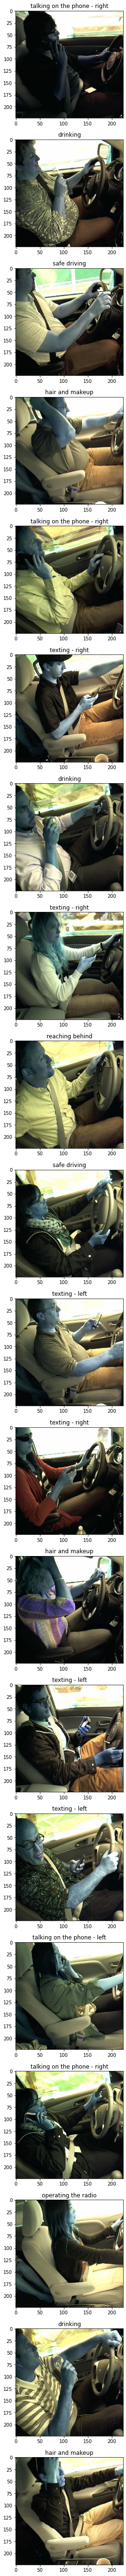

In [38]:
i = 0
fig, ax = plt.subplots(20, 1, figsize = (100,100))

for i in range(20):
    ax[i].imshow(test[i].squeeze())
    predicted_class = 'C'+str(np.where(prediction[i] == np.amax(prediction[i]))[0][0])
    ax[i].set_title(tags[predicted_class])
    plt.show
    


In [39]:
import os
files = os.listdir("C:\\Users\\rvasw\\Downloads\\state-farm-distracted-driver-detection\\imgs\\test")
# nums = np.random.randint(low=1, high=len(files))

test_image_all=[]
names=[]
for i in range(len(files)):
    print ('Image number:',i,)
#     img = "C:\\Users\\rvasw\\Downloads\\state-farm-distracted-driver-detection\\imgs\\test\\"+files[i]
#     print(img)
    
    img = cv2.imread("C:\\Users\\rvasw\\Downloads\\state-farm-distracted-driver-detection\\imgs\\test\\"+files[i])
    #img = color.rgb2gray(img)
    img = img[50:,120:-50]
    img = cv2.resize(img,(224,224))
    names.append(files[i])
    test_image_all.append(img)

Image number: 0
Image number: 1
Image number: 2
Image number: 3
Image number: 4
Image number: 5
Image number: 6
Image number: 7
Image number: 8
Image number: 9
Image number: 10
Image number: 11
Image number: 12
Image number: 13
Image number: 14
Image number: 15
Image number: 16
Image number: 17
Image number: 18
Image number: 19
Image number: 20
Image number: 21
Image number: 22
Image number: 23
Image number: 24
Image number: 25
Image number: 26
Image number: 27
Image number: 28
Image number: 29
Image number: 30
Image number: 31
Image number: 32
Image number: 33
Image number: 34
Image number: 35
Image number: 36
Image number: 37
Image number: 38
Image number: 39
Image number: 40
Image number: 41
Image number: 42
Image number: 43
Image number: 44
Image number: 45
Image number: 46
Image number: 47
Image number: 48
Image number: 49
Image number: 50
Image number: 51
Image number: 52
Image number: 53
Image number: 54
Image number: 55
Image number: 56
Image number: 57
Image number: 58
Image n

In [83]:
names[:5]

['img_1.jpg', 'img_10.jpg', 'img_100.jpg', 'img_1000.jpg', 'img_100000.jpg']

In [87]:
np.amax(test_image_all[5])

255

In [84]:
# test1 = []

# for img in test_image_all:
#     test1.append(img)
    
# model.load_weights('mobilenet_sgd_nolayers.hdf5')


# test1 = np.array(test1).reshape(-1,224,224,3)
# prediction = model.predict(test1)

In [42]:
len(test1)

79726

In [43]:
test2=test1[:35000]
len(test2)

35000

In [50]:
len(names)

79726

In [52]:
name1=names[:35000]
name2=names[35000:]
len(name1),len(name2)

(35000, 44726)

In [48]:
test3=test1[35000:]
len(test3)

44726

In [44]:
prediction = model.predict(test2)

1094/1094 [==============================] - 273s 247ms/step


In [49]:
prediction1 = model.predict(test3)

1398/1398 [==============================] - 353s 251ms/step


In [45]:
df_dd_pred=pd.DataFrame(data=prediction)
df_dd_pred.to_csv('dd_dd_pred.csv')

In [53]:
# list(zip(names,prediction))

dfdd1=pd.DataFrame(data=list(zip(name1,prediction)),columns=['Names','prediction'])
dfdd1.to_csv('C:/Users/rvasw/Downloads/dfdd2.csv')

In [54]:
dfdd2=pd.DataFrame(data=list(zip(name2,prediction1)),columns=['Names','prediction'])
dfdd2.to_csv('C:/Users/rvasw/Downloads/dfdd3.csv')

In [55]:
dfdd1.head()

Names                                         prediction
0       img_1.jpg  [0.0014836519, 0.0012362623, 0.0008102682, 0.0...
1      img_10.jpg  [0.0010898705, 1.103768e-07, 3.166042e-08, 7.0...
2     img_100.jpg  [0.491904, 0.051381733, 1.933378e-05, 0.000409...
3    img_1000.jpg  [3.0616993e-06, 2.9616613e-05, 0.252434, 1.378...
4  img_100000.jpg  [1.6702628e-05, 8.99171e-07, 5.717948e-09, 0.9...

In [58]:
dfdd1['prediction'][0]

10

In [59]:
df4=pd.read_csv(r"C:\Users\rvasw\Downloads\dfdd2.csv")
df4.head()

Unnamed: 0           Names  \
0           0       img_1.jpg   
1           1      img_10.jpg   
2           2     img_100.jpg   
3           3    img_1000.jpg   
4           4  img_100000.jpg   

                                          prediction  
0  [1.4836519e-03 1.2362623e-03 8.1026822e-04 4.6...  
1  [1.0898705e-03 1.1037680e-07 3.1660420e-08 7.0...  
2  [4.9190399e-01 5.1381733e-02 1.9333780e-05 4.0...  
3  [3.0616993e-06 2.9616613e-05 2.5243399e-01 1.3...  
4  [1.6702628e-05 8.9917103e-07 5.7179479e-09 9.9...

In [62]:
df4['prediction'][0]

'[1.4836519e-03 1.2362623e-03 8.1026822e-04 4.6150191e-03 3.0387900e-04\n 8.3226091e-01 3.3682287e-03 1.1015989e-02 3.2773681e-02 1.1213213e-01]'

In [64]:
len(df4['prediction'][0])

142

In [66]:
len(df4['prediction'][0].split())

10

In [67]:
type(df4['prediction'][0])

str

In [70]:
prediction[0]

array([1.4836519e-03, 1.2362623e-03, 8.1026822e-04, 4.6150191e-03,
       3.0387900e-04, 8.3226091e-01, 3.3682287e-03, 1.1015989e-02,
       3.2773681e-02, 1.1213213e-01], dtype=float32)

In [71]:
list(prediction[0])

[0.0014836519,
 0.0012362623,
 0.0008102682,
 0.004615019,
 0.000303879,
 0.8322609,
 0.0033682287,
 0.011015989,
 0.03277368,
 0.11213213]

In [79]:
lp11=[]

lp11=list(prediction1)
len(lp11)

44726

In [80]:
lp2=[]

for i in lp11:
    lp2.append(list(i))
len(lp2),lp2[0]

(44726,
 [0.357165,
  0.0068159844,
  0.002324473,
  0.0005667685,
  0.0020332865,
  0.038442448,
  0.004849058,
  0.0035483723,
  0.05919357,
  0.5250611])

In [81]:
df2=pd.DataFrame(data=list(zip(name2,lp2)),columns=['Names','prediction'])
df2.to_csv('C:/Users/rvasw/Downloads/dfn2.csv')